# Pandas

`pandas` stands for [Python Data Analysis Library](https://pandas.pydata.org/). Two of the main data structures in pandas are `Series` and `DataFrame`. The `series` data structure is a glorified list with batteries included, and the `dataframe` is a glorified table with extra, extra batteries included. You get a lot of additional and handy features by using these data structures to store and represent your data as lists or tables. 

## Pandas Series

The easiest way to understand a `Series` is to simply create one. At the data level, a series is simply just a list of data.

In [1]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

With every element in the list is a corresponding index. The index may not seem important at first glance, but it is very important later when you need to filter or slice the series. If you do not specify the index for each element, a sequential and numeric one is created automatically (starting from zero). Here is how you can create a series with the index specified.

In [2]:
s = pd.Series([1, 2, 3, 4], index=[10, 11, 12, 13])
s

10    1
11    2
12    3
13    4
dtype: int64

The index can also be string type.

In [3]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

You can access the `index` and `values` of a series individually.

In [4]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
s.values

array([1, 2, 3, 4])

Why would you ever want string values for an index? Let's say we have a count of left and right handedness in a room. We can represent this data as a series.

In [6]:
s = pd.Series([10, 15], index=['left', 'right'])
s

left     10
right    15
dtype: int64

And then, we can magically plot the bar chart showing the counts of left and right handedness in the room.

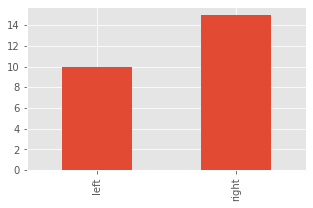

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(5, 3))
_ = s.plot(kind='bar', ax=ax)

### Functions

There are just too many useful functions attached to a series. Here's a few that are interesting.

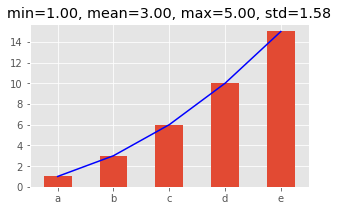

In [8]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
_mean = s.mean()
_min = s.min()
_max = s.max()
_std = s.std()

fig, ax = plt.subplots(figsize=(5, 3))
_ = s.cumsum().plot(kind='bar', ax=ax)
_ = s.cumsum().plot(kind='line', ax=ax, color='blue')
_ = ax.set_title(f'min={_min:.2f}, mean={_mean:.2f}, max={_max:.2f}, std={_std:.2f}')

The `value_counts()` function can quickly give you the frequencies of unique values.

In [9]:
s = pd.Series([1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4])
s.value_counts()

4    4
2    3
3    2
1    2
dtype: int64

### Filtering

Filtering is important. Let's see how to filter based on values.

In [10]:
s = pd.Series([1, 2, 3, 4])
s1 = s[s > 2]
s1

2    3
3    4
dtype: int64

How do we filter based on index?

In [11]:
s2 = s[s.index < 2]
s2

0    1
1    2
dtype: int64

In [12]:
s2 = s[s.index.isin([0, 1])]
s2

0    1
1    2
dtype: int64

### Iteration

Iteration of the index and values of a series is accomplished with `zip`.

In [13]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
for i, v in zip(s.index, s.values):
    print(f'{i}: {v}')

a: 1
b: 2
c: 3
d: 4
e: 5


### To dataframe

We will talk about Pandas dataframes next, but for now, it's quite easy to convert a series to a dataframe using `.to_frame()`. Note that we have to supply the `name` so that the column name is meaningful.

In [14]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'], name='number')
s

a    1
b    2
c    3
d    4
e    5
Name: number, dtype: int64

In [15]:
s.to_frame()

,number
a,1
b,2
c,3
d,4
e,5


## Pandas Dataframes

Dataframes are the most powerful data structure in pandas. As a start, it's helpful to simply think of a dataframe as a table. Below, we create a dataframe from a list of tuples, where each tuple is a pair of numbers. Notice how the columns are not specified and so they default to *0* and *1*, and the index is not specified so a numeric, sequential one is created.

In [16]:
df = pd.DataFrame([(1, 2), (3, 4), (5, 6)])
df

,0,1
0,1,2
1,3,4
2,5,6


If we wanted to specify the column names, supply a list of column names.

In [17]:
df = pd.DataFrame([(1, 2), (3, 4), (5, 6)], columns=['x', 'y'])
df

,x,y
0,1,2
1,3,4
2,5,6


If we need to specify the index, supply a list of index for each row.

In [18]:
df = pd.DataFrame([(1, 2), (3, 4), (5, 6)], columns=['x', 'y'], index=['a', 'b', 'c'])
df

,x,y
a,1,2
b,3,4
c,5,6


There's other ways to create a dataframe. Let's use a list of dictionaries. Notice how we do not need to supply a list of column names?

In [19]:
df = pd.DataFrame([
    {'x': 1, 'y': 2},
    {'x': 3, 'y': 4},
    {'x': 5, 'y': 6}
], index=['a', 'b', 'c'])
df

,x,y
a,1,2
b,3,4
c,5,6


Above, we used a list of dictionaries, below, we use a dictionary of lists.

In [20]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])
df

,x,y
a,1,2
b,3,4
c,4,5


### Properties
There's a lot of neat and useful properties and functions attached to a dataframe. The `dtypes` property gives you the data types of your fields.

In [21]:
df.dtypes

x    int64
y    int64
dtype: object

You can set the type of your data when you create a data frame by supplying the `dtype` value.

In [22]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'], dtype='int32')
df.dtypes

x    int32
y    int32
dtype: object

Look at what happens when you have missing values and do not specify the type. The `y` column is now of type `float64`.

In [23]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, None]
}, index=['a', 'b', 'c'])
df.dtypes

x      int64
y    float64
dtype: object

Look at what happens when you have missing values and attempt to specify the type. The `y` column is now of type `object`.

In [24]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, None]
}, index=['a', 'b', 'c'], dtype='int32')
df.dtypes

x     int32
y    object
dtype: object

If you need to know the dimensions of your dataframe, use the `shape` property.

In [25]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

df.shape

(3, 2)

You can turn your dataframe into a `numpy` array using `values`.

In [26]:
df.values

array([[1, 2],
       [3, 4],
       [4, 5]])

### Columns or fields

You can access each column by bracket `[]` or dot notation `.`. To access a column by name, specify the column name inside the brackets.

In [27]:
df['x']

a    1
b    3
c    4
Name: x, dtype: int64

In [28]:
df['y']

a    2
b    4
c    5
Name: y, dtype: int64

Multiple columns may be selecting by passing a list of column names.

In [29]:
df[['x', 'y']]

,x,y
a,1,2
b,3,4
c,4,5


To access the columns by dot notation, do the following. Be careful when accessing columns/fields using dot notation; if you have a field that is named the same as a function attached to the dataframe (e.g. mean), the function has precedence over the field (e.g. `df['mean']` is preferred over `df.mean`).

In [30]:
df.x

a    1
b    3
c    4
Name: x, dtype: int64

In [31]:
df.y

a    2
b    4
c    5
Name: y, dtype: int64

Note that accessing a column will return that column as a series, and the usual series properties and functions may be applied.

In [32]:
df.x.sum()

8

In [33]:
df.x.mean()

2.6666666666666665

In [34]:
df.x.std()

1.5275252316519465

In [35]:
df.x.min()

1

In [36]:
df.x.max()

4

### Rows or records

To access the rows or records, use `iloc` and specify the numeric location value or `loc` and specify the index value. Below, `.iloc[0]` refers to the first record.

In [37]:
df.iloc[0]

x    1
y    2
Name: a, dtype: int64

Below, `.loc['a']` refers to the row corresponding to the `a` index value.

In [38]:
df.loc['a']

x    1
y    2
Name: a, dtype: int64

Multiple rows may be selected by numeric index through slicing.

In [39]:
df.iloc[0:2]

,x,y
a,1,2
b,3,4


In [40]:
df.iloc[2:3]

,x,y
c,4,5


Accessing rows/records using `loc` or `iloc` typically returns another dataframe (as opposed to bracket and dot notations with columns, which returns a series).

### Methods

Use `describe()` to get summary statistics over your fields.

In [41]:
df.describe()

,x,y
count,3.000000,3.000000
mean,2.666667,3.666667
std,1.527525,1.527525
min,1.000000,2.000000
25%,2.000000,3.000000
50%,3.000000,4.000000
75%,3.500000,4.500000
max,4.000000,5.000000


The `info()` method gives other types of field profiling information.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, a to c
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       3 non-null      int64
 1   y       3 non-null      int64
dtypes: int64(2)
memory usage: 152.0+ bytes


The cummulative sum is retrieved by calling `cumsum()`.

In [43]:
df.cumsum()

,x,y
a,1,2
b,4,6
c,8,11


You can mathematically operate on a dataframe. Below, we turn the integer values into percentages.

In [44]:
df / df.sum() 

,x,y
a,0.125,0.181818
b,0.375,0.363636
c,0.500,0.454545


Transposing is easy.

In [45]:
df.transpose()

,a,b,c
x,1,3,4
y,2,4,5


You can also transpose a dataframe as follows.

In [46]:
df.T

,a,b,c
x,1,3,4
y,2,4,5


### Conversion

There's quite a few different ways to convert fields.

In [47]:
df = pd.DataFrame({
    'x': [1.0, 2.0, 3.0],
    'y': ['2021-12-01', '2021-12-02', '2021-12-03'],
    'z': ['10', '20', '30']
})

df

,x,y,z
0,1.0,2021-12-01,10
1,2.0,2021-12-02,20
2,3.0,2021-12-03,30


Use `pd.to_datetime()` to convert `str` to `datetime64[ns]`.

In [48]:
pd.to_datetime(df.y)

0   2021-12-01
1   2021-12-02
2   2021-12-03
Name: y, dtype: datetime64[ns]

In [49]:
pd.to_datetime(df.y, format='%Y-%m-%d')

0   2021-12-01
1   2021-12-02
2   2021-12-03
Name: y, dtype: datetime64[ns]

The `astype()` function can also be used to convert data types.

In [50]:
df['y'].astype('datetime64[ns]')

0   2021-12-01
1   2021-12-02
2   2021-12-03
Name: y, dtype: datetime64[ns]

In [51]:
df['x'].astype('int')

0    1
1    2
2    3
Name: x, dtype: int64

In [52]:
df['z'].astype('int')

0    10
1    20
2    30
Name: z, dtype: int64

### Joining and concatenating

Dataframes can be joined. The easiest way is to join two dataframes based on index values. This stacks up the dataframes horizontally or the wide way.

In [53]:
df1 = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

df2 = pd.DataFrame({
    'v': [6, 7, 8],
    'w': [9, 10, 11]
}, index=['a', 'b', 'c'])

df1.join(df2)

,x,y,v,w
a,1,2,6,9
b,3,4,7,10
c,4,5,8,11


If the field you want to join on is not in the index, you can set the index `set_index()` to the field you want to join on at join time.

In [54]:
df1 = pd.DataFrame({
    'id': ['a', 'b', 'c'],
    'x': [1, 3, 4],
    'y': [2, 4, 5]
})

df2 = pd.DataFrame({
    'id': ['a', 'b', 'c'],
    'v': [6, 7, 8],
    'w': [9, 10, 11]
})

df1.set_index('id') \
    .join(df2.set_index('id'))

,x,y,v,w
id,,,,
a,1,2,6,9
b,3,4,7,10
c,4,5,8,11


If you want the `id` colum back into the dataframe, then call `reset_index()` after joining.

In [55]:
df1.set_index('id') \
    .join(df2.set_index('id')) \
    .reset_index()

,id,x,y,v,w
0,a,1,2,6,9
1,b,3,4,7,10
2,c,4,5,8,11


Dataframes can also be `concatenated` vertically or the long way.

In [56]:
df1 = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

df2 = pd.DataFrame({
    'x': [6, 7, 8],
    'y': [9, 10, 11]
}, index=['d', 'e', 'f'])

pd.concat([df1, df2])

,x,y
a,1,2
b,3,4
c,4,5
d,6,9
e,7,10
f,8,11


### Multiple indexes

Indexes plays a very important role in organizing your data in a dataframe. For the most part, we have shown a single index on a dataframe. But a dataframe can have a multiple indices using `MultiIndex`. Below, we create a fictitious set of data of handedness and sports by gender. 

In [57]:
row_index = pd.MultiIndex.from_tuples([
    ('left', 'soccer'), 
    ('left', 'baseball'), 
    ('right', 'soccer'), 
    ('right', 'baseball')])
data = {
    'male': [5, 10, 15, 20], 
    'female': [6, 11, 20, 25]
}
pd.DataFrame(data, index=row_index)

male  female
left  soccer       5       6
      baseball    10      11
right soccer      15      20
      baseball    20      25

The column index can also have multiple indexes.

In [58]:
row_index = pd.MultiIndex.from_tuples([
    ('left', 'soccer'), 
    ('left', 'baseball'), 
    ('right', 'soccer'), 
    ('right', 'baseball')])

col_index = pd.MultiIndex.from_tuples([
    ('amateur', 'male'),
    ('amateur', 'female'),
    ('pro', 'male'),
    ('pro', 'female')
])

data = [
    [5, 10, 15, 20], 
    [6, 11, 20, 25],
    [10, 11, 25, 30], 
    [15, 17, 30, 35]
]

df = pd.DataFrame(data, index=row_index, columns=col_index)
df

amateur         pro       
                  male female male female
left  soccer         5     10   15     20
      baseball       6     11   20     25
right soccer        10     11   25     30
      baseball      15     17   30     35

### Filtering rows

Let's see how filtering for records in a dataframe works. One filtering approach is by index.

In [59]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])


df[df.x >= 3]

,x,y
b,3,4
c,4,5


We can filter by index using boolean logic with `and` (`&`) or `or` (`|`). Notice how we have to use parentheses around the comparisons?

In [60]:
df[(df.x >= 3) & (df.y > 4)]

,x,y
c,4,5


In [61]:
df[(df.x >= 3) | (df.y > 4)]

,x,y
b,3,4
c,4,5


If you are familiar with Structured Query Language `SQL`, you can filter using the `query()` method specifying the conditions as in a SQL `where` clause.

In [62]:
df.query('x >= 3 and y > 4')

,x,y
c,4,5


In [63]:
df.query('x >= 3 or y > 4')

,x,y
b,3,4
c,4,5


You can also use `numpy` to filter rows.

In [64]:
import numpy as np

df[np.logical_and(df.x >= 3, df.y > 4)]

,x,y
c,4,5


In [65]:
df[np.logical_or(df.x >= 3, df.y > 4)]

,x,y
b,3,4
c,4,5


In [66]:
df[np.logical_not(df.x == 3)]

,x,y
a,1,2
c,4,5


What about filtering date fields? 

In [67]:
df = pd.DataFrame({
    'x': [i for i in range(1, 32)],
    'y': pd.to_datetime([f'2021-12-{i:02}' for i in range(1, 32)])
})

df.head()

,x,y
0,1,2021-12-01
1,2,2021-12-02
2,3,2021-12-03
3,4,2021-12-04
4,5,2021-12-05


In [68]:
df.query('y > "2021-12-25"')

,x,y
25,26,2021-12-26
26,27,2021-12-27
27,28,2021-12-28
28,29,2021-12-29
29,30,2021-12-30
30,31,2021-12-31


In [69]:
df[df.y > '2021-12-25']

,x,y
25,26,2021-12-26
26,27,2021-12-27
27,28,2021-12-28
28,29,2021-12-29
29,30,2021-12-30
30,31,2021-12-31


In [70]:
df.query('"2021-12-20" < y  < "2021-12-25"')

,x,y
20,21,2021-12-21
21,22,2021-12-22
22,23,2021-12-23
23,24,2021-12-24


In [71]:
df[('2021-12-20' < df.y) & (df.y < '2021-12-25')]

,x,y
20,21,2021-12-21
21,22,2021-12-22
22,23,2021-12-23
23,24,2021-12-24


What about filtering against a multi-index?

In [72]:
row_index = pd.MultiIndex.from_tuples([
    ('left', 'soccer'), 
    ('left', 'baseball'), 
    ('right', 'soccer'), 
    ('right', 'baseball')])

col_index = pd.MultiIndex.from_tuples([
    ('amateur', 'male'),
    ('amateur', 'female'),
    ('pro', 'male'),
    ('pro', 'female')
])

data = [
    [5, 10, 15, 20], 
    [6, 11, 20, 25],
    [10, 11, 25, 30], 
    [15, 17, 30, 35]
]

df = pd.DataFrame(data, index=row_index, columns=col_index)
df

amateur         pro       
                  male female male female
left  soccer         5     10   15     20
      baseball       6     11   20     25
right soccer        10     11   25     30
      baseball      15     17   30     35

In [73]:
df[df.index.isin(['left'], level=0)]

amateur         pro       
                 male female male female
left soccer         5     10   15     20
     baseball       6     11   20     25

In [74]:
df[df.index.isin(['right'], level=0)]

amateur         pro       
                  male female male female
right soccer        10     11   25     30
      baseball      15     17   30     35

In [75]:
df[df.index.isin(['soccer'], level=1)]

amateur         pro       
                male female male female
left  soccer       5     10   15     20
right soccer      10     11   25     30

In [76]:
df[df.index.isin(['baseball'], level=1)]

amateur         pro       
                  male female male female
left  baseball       6     11   20     25
right baseball      15     17   30     35

### Filtering columns

What about subsetting or slicing multi-index columns? 

In [77]:
df.loc[:, df.columns.get_level_values(0).isin(['amateur'])]

amateur       
                  male female
left  soccer         5     10
      baseball       6     11
right soccer        10     11
      baseball      15     17

In [78]:
df.loc[:, df.columns.get_level_values(0).isin(['pro'])]

pro       
               male female
left  soccer     15     20
      baseball   20     25
right soccer     25     30
      baseball   30     35

In [79]:
df.loc[:, df.columns.get_level_values(1).isin(['male'])]

amateur  pro
                  male male
left  soccer         5   15
      baseball       6   20
right soccer        10   25
      baseball      15   30

In [80]:
df.loc[:, df.columns.get_level_values(1).isin(['female'])]

amateur    pro
                female female
left  soccer        10     20
      baseball      11     25
right soccer        11     30
      baseball      17     35

### Iteration

How do we iterate over a dataframe? Use the `iterrows()` function.

In [81]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

for _index, row in df.iterrows():
    s = {c: row[c] for c in df.columns}
    print(f'{_index}: {s}')

a: {'x': 1, 'y': 2}
b: {'x': 3, 'y': 4}
c: {'x': 4, 'y': 5}


### Transformation by row

What if we want to create a new column based on the whole row? Use the `apply` method on the dataframe and specify the axis to be *1* for column.

In [82]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

df['z'] = df.apply(lambda r: r.x + r.y, axis=1)
df

,x,y,z
a,1,2,3
b,3,4,7
c,4,5,9


### Transformation by column

What if we want to create a new column based on a column? Use the `apply` method on the column.

In [83]:
df = pd.DataFrame({
    'x': [1, 3, 4],
    'y': [2, 4, 5]
}, index=['a', 'b', 'c'])

df['z'] = df.x.apply(lambda x: x**2)
df

,x,y,z
a,1,2,1
b,3,4,9
c,4,5,16


### Transformation of a dataframe

If you need to transform the dataframe as a whole, you should use the `pipe()` function which can be chained in a `fluent` way. Below, we have made up data on students; we have their handedness and overall numeric grade. We want to transform the encoding of handedness from 0 and 1 to left and right, respectively, and also numeric grade to letter grade. It will be fun to also transform the name to be properly cased and decomposed into its component parts (first name and last name).

In [84]:
df = pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'score': [0.95, 0.85, 0.75, 0.65]
})
df

,name,handedness,score
0,john doe,0,0.95
1,jack smith,1,0.85
2,jason demming,0,0.75
3,joe turing,1,0.65


Take notice that each of these transformations return the dataframe. Otherwise, you will have `None` returned and chaining will break.

In [85]:
def properly_case(df):
    df.name = df.name.apply(lambda n: n.title())
    return df

def decompose_name(df):
    df['first_name'] = df.name.apply(lambda n: n.split(' ')[0].strip())
    df['last_name'] = df.name.apply(lambda n: n.split(' ')[1].strip())
    return df
    
def reencode_handedness(df):
    df.handedness = df.handedness.apply(lambda h: 'left' if h == 0 else 'right')
    return df
    
def convert_letter_grade(df):
    def get_letter_grade(g):
        if g >= 0.90:
            return 'A'
        elif g >= 0.80:
            return 'B'
        elif g >= 0.70:
            return 'C'
        elif g >= 0.60:
            return 'D'
        else:
            return 'F'
    df['grade'] = df.score.apply(lambda s: get_letter_grade(s))
    return df

df = pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'score': [0.95, 0.85, 0.75, 0.65]
})

df \
    .pipe(properly_case) \
    .pipe(decompose_name) \
    .pipe(reencode_handedness) \
    .pipe(convert_letter_grade)

df

,name,handedness,score,first_name,last_name,grade
0,John Doe,left,0.95,John,Doe,A
1,Jack Smith,right,0.85,Jack,Smith,B
2,Jason Demming,left,0.75,Jason,Demming,C
3,Joe Turing,right,0.65,Joe,Turing,D


If you are piping a lot transformations, use the line continuation character `\`.

In [86]:
df = pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'score': [0.95, 0.85, 0.75, 0.65]
})

df = df.pipe(properly_case)\
        .pipe(decompose_name)\
        .pipe(reencode_handedness)\
        .pipe(convert_letter_grade)

df

,name,handedness,score,first_name,last_name,grade
0,John Doe,left,0.95,John,Doe,A
1,Jack Smith,right,0.85,Jack,Smith,B
2,Jason Demming,left,0.75,Jason,Demming,C
3,Joe Turing,right,0.65,Joe,Turing,D


The line continuation character can become a nuisance, so wrap your chaining inside parentheses.

In [87]:
df = pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'score': [0.95, 0.85, 0.75, 0.65]
})

df = (df.pipe(properly_case)
        .pipe(decompose_name)
        .pipe(reencode_handedness)
        .pipe(convert_letter_grade))

df

,name,handedness,score,first_name,last_name,grade
0,John Doe,left,0.95,John,Doe,A
1,Jack Smith,right,0.85,Jack,Smith,B
2,Jason Demming,left,0.75,Jason,Demming,C
3,Joe Turing,right,0.65,Joe,Turing,D


You can also use the `assign()` function to modify columns or create new ones. The difference between `pipe()` and `assign()` is that the former can create multiple columns per invocation and the latter is used to create one column per invocation.

In [88]:
score2grade = lambda s: 'A' if s >= 0.9 else 'B' if s >= 0.8 else 'C' if s >= 0.7 else 'D' if s >= 0.6 else 'F'

pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'score': [0.95, 0.85, 0.75, 0.65]
}).assign(
    name=lambda d: d['name'].apply(lambda n: n.title()),
    handedness=lambda d: d['handedness'].apply(lambda h: 'left' if h == 0 else 'right'),
    first_name=lambda d: d['name'].apply(lambda n: n.split(' ')[0]),
    last_name=lambda d: d['name'].apply(lambda n: n.split(' ')[1]),
    grade=lambda d: d['score'].apply(score2grade)
)

,name,handedness,score,first_name,last_name,grade
0,John Doe,left,0.95,John,Doe,A
1,Jack Smith,right,0.85,Jack,Smith,B
2,Jason Demming,left,0.75,Jason,Demming,C
3,Joe Turing,right,0.65,Joe,Turing,D


The `assign()` function also takes in a dictionary where keys are strings (field names) and values are callable.

In [89]:
pd.DataFrame({
    'name': ['john doe', 'jack smith', 'jason demming', 'joe turing'],
    'handedness': [0, 1, 0, 1],
    'spelling': [0.95, 0.85, 0.75, 0.65],
    'math': [0.65, 0.75, 0.85, 0.95]
}).assign(**{
    'spelling': lambda d: d['spelling'].apply(score2grade),
    'math': lambda d: d['math'].apply(score2grade)
})

,name,handedness,spelling,math
0,john doe,0,A,D
1,jack smith,1,B,C
2,jason demming,0,C,B
3,joe turing,1,D,A


If you want, you can use a dictionary comprehension with `assign()` as well.

In [90]:
pd.DataFrame({
    'd1': ['2022-01-01', '2022-01-02'],
    'd2': ['2022-02-01', '2022-02-02']
}).assign(**{c: lambda d: pd.to_datetime(d[c]) for c in ['d1', 'd2']})

,d1,d2
0,2022-02-01,2022-02-01
1,2022-02-02,2022-02-02


### Aggregation

Aggregations are typically accomplished by grouping and then performing a summary statistic operation. Below, we generate fake data. There will be some categorical variables (fields) such as sport, handedness, league and gender, and one continuous variable called stats. Stats is made up and means nothing;

In [91]:
from itertools import product, chain
import numpy as np
import random
from random import randint

np.random.seed(37)
random.seed(37)

sports = ['baseball', 'basketball']
handedness = ['left', 'right']
leagues = ['amateur', 'pro']
genders = ['male', 'female']

get_mean = lambda tup: ord(tup[0][0]) + ord(tup[1][0]) + ord(tup[2][0]) + ord(tup[3][0])
get_samples = lambda m, n: np.random.normal(m, 1.0, n)

data = product(*[sports, handedness, leagues, genders])
data = map(lambda tup: (tup, get_mean(tup)), data)
data = map(lambda tup: (tup[0], get_samples(tup[1], randint(5, 20))), data)
data = map(lambda tup: [tup[0] + (m, ) for m in tup[1]], data)
data = chain(*data)

df = pd.DataFrame(data, columns=['sport', 'handedness', 'league', 'gender', 'stats'])
df.head()

,sport,handedness,league,gender,stats
0,baseball,left,amateur,male,411.945536
1,baseball,left,amateur,male,412.674308
2,baseball,left,amateur,male,412.346647
3,baseball,left,amateur,male,410.699654
4,baseball,left,amateur,male,413.518512


What if we wanted the mean of the stats by sports? Notice how below, the resulting dataframe has a multi-index column?

In [92]:
df.groupby(['sport']).agg(['mean'])

,stats
,mean
sport,
baseball,420.689231
basketball,416.167987


To get rid of the first level (or the mean level), use the `droplevel()` function.

In [93]:
df.groupby(['sport'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

,stats
sport,
baseball,420.689231
basketball,416.167987


We can also get the means of the stats by handedness, league and gender alone.

In [94]:
df.groupby(['handedness'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

,stats
handedness,
left,416.043975
right,420.895420


In [95]:
df.groupby(['league'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

,stats
league,
amateur,410.813160
pro,426.221361


In [96]:
df.groupby(['gender'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

,stats
gender,
female,415.605160
male,422.512933


If we wanted the means by more than one variable, just expand the list of column names as follows.

In [97]:
df.groupby(['sport', 'handedness'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

stats
sport      handedness            
baseball   left        419.432848
           right       421.728995
basketball left        412.915783
           right       419.844391

In [98]:
df.groupby(['sport', 'handedness', 'league'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

stats
sport      handedness league             
baseball   left       amateur  409.109277
                      pro      423.267318
           right      amateur  412.970497
                      pro      429.357364
basketball left       amateur  408.508027
                      pro      423.788250
           right      amateur  412.780854
                      pro      428.253365

In [99]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean'])\
    .droplevel(1, axis=1)

stats
sport      handedness league  gender            
baseball   left       amateur female  405.328072
                              male    412.350309
                      pro     female  420.155320
                              male    426.962816
           right      amateur female  410.961691
                              male    417.741414
                      pro     female  426.160493
                              male    433.239279
basketball left       amateur female  404.991257
                              male    412.220172
                      pro     female  420.208283
                              male    426.174895
           right      amateur female  410.826709
                              male    417.805797
                      pro     female  425.894610
                              male    432.970873

To request more aggregation summary statistics, expand the list of aggregations.

In [100]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)

mean         min         max  \
sport      handedness league  gender                                       
baseball   left       amateur female  405.328072  404.172421  406.228386   
                              male    412.350309  410.699654  413.518512   
                      pro     female  420.155320  417.947217  421.759028   
                              male    426.962816  424.930852  428.893506   
           right      amateur female  410.961691  409.547163  412.946440   
                              male    417.741414  416.262047  419.593947   
                      pro     female  426.160493  424.113997  428.211154   
                              male    433.239279  431.260819  435.228304   
basketball left       amateur female  404.991257  403.477167  406.783491   
                              male    412.220172  410.654588  413.798044   
                      pro     female  420.208283  419.230094  421.625440   
                              male    426.174895  425.338888  427.405752   
           right      amateur female  410.826709  408.707288  412.402071   
                              male    417.805797  416.448519  419.818477   
                      pro     female  425.894610  424.206988  427.819129   
                              male    432.970873  431.193658  433.845848   

                                              sum       std  
sport      handedness league  gender                         
baseball   left       amateur female  2431.968434  0.803801  
                              male    2886.452162  0.891856  
                      pro     female  7982.951080  1.069645  
                              male    6831.405049  1.049972  
           right      amateur female  7808.272122  0.921281  
                              male    3341.931309  1.193814  
                      pro     female  7244.728380  1.090030  
                              male    6065.349899  1.216080  
basketball left       amateur female  7694.833890  1.128673  
                              male    7419.963096  0.959847  
                      pro     female  2521.249697  0.813595  
                              male    3835.574056  0.703688  
           right      amateur female  7394.880760  1.003581  
                              male    2924.640580  1.117527  
                      pro     female  5962.524544  0.875827  
                              male    3030.796113  0.881753

### Sorting

The function `sort_values` can sort the records by index. Below, we sort by gender. If not specified, the sort will always be ascendingly.

In [101]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)\
    .sort_values(['gender'])

mean         min         max  \
sport      handedness league  gender                                       
baseball   left       amateur female  405.328072  404.172421  406.228386   
                      pro     female  420.155320  417.947217  421.759028   
           right      amateur female  410.961691  409.547163  412.946440   
                      pro     female  426.160493  424.113997  428.211154   
basketball left       amateur female  404.991257  403.477167  406.783491   
                      pro     female  420.208283  419.230094  421.625440   
           right      amateur female  410.826709  408.707288  412.402071   
                      pro     female  425.894610  424.206988  427.819129   
baseball   left       amateur male    412.350309  410.699654  413.518512   
                      pro     male    426.962816  424.930852  428.893506   
           right      amateur male    417.741414  416.262047  419.593947   
                      pro     male    433.239279  431.260819  435.228304   
basketball left       amateur male    412.220172  410.654588  413.798044   
                      pro     male    426.174895  425.338888  427.405752   
           right      amateur male    417.805797  416.448519  419.818477   
                      pro     male    432.970873  431.193658  433.845848   

                                              sum       std  
sport      handedness league  gender                         
baseball   left       amateur female  2431.968434  0.803801  
                      pro     female  7982.951080  1.069645  
           right      amateur female  7808.272122  0.921281  
                      pro     female  7244.728380  1.090030  
basketball left       amateur female  7694.833890  1.128673  
                      pro     female  2521.249697  0.813595  
           right      amateur female  7394.880760  1.003581  
                      pro     female  5962.524544  0.875827  
baseball   left       amateur male    2886.452162  0.891856  
                      pro     male    6831.405049  1.049972  
           right      amateur male    3341.931309  1.193814  
                      pro     male    6065.349899  1.216080  
basketball left       amateur male    7419.963096  0.959847  
                      pro     male    3835.574056  0.703688  
           right      amateur male    2924.640580  1.117527  
                      pro     male    3030.796113  0.881753

Now we sort by gender and league.

In [102]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)\
    .sort_values(['gender', 'league'])

mean         min         max  \
sport      handedness league  gender                                       
baseball   left       amateur female  405.328072  404.172421  406.228386   
           right      amateur female  410.961691  409.547163  412.946440   
basketball left       amateur female  404.991257  403.477167  406.783491   
           right      amateur female  410.826709  408.707288  412.402071   
baseball   left       pro     female  420.155320  417.947217  421.759028   
           right      pro     female  426.160493  424.113997  428.211154   
basketball left       pro     female  420.208283  419.230094  421.625440   
           right      pro     female  425.894610  424.206988  427.819129   
baseball   left       amateur male    412.350309  410.699654  413.518512   
           right      amateur male    417.741414  416.262047  419.593947   
basketball left       amateur male    412.220172  410.654588  413.798044   
           right      amateur male    417.805797  416.448519  419.818477   
baseball   left       pro     male    426.962816  424.930852  428.893506   
           right      pro     male    433.239279  431.260819  435.228304   
basketball left       pro     male    426.174895  425.338888  427.405752   
           right      pro     male    432.970873  431.193658  433.845848   

                                              sum       std  
sport      handedness league  gender                         
baseball   left       amateur female  2431.968434  0.803801  
           right      amateur female  7808.272122  0.921281  
basketball left       amateur female  7694.833890  1.128673  
           right      amateur female  7394.880760  1.003581  
baseball   left       pro     female  7982.951080  1.069645  
           right      pro     female  7244.728380  1.090030  
basketball left       pro     female  2521.249697  0.813595  
           right      pro     female  5962.524544  0.875827  
baseball   left       amateur male    2886.452162  0.891856  
           right      amateur male    3341.931309  1.193814  
basketball left       amateur male    7419.963096  0.959847  
           right      amateur male    2924.640580  1.117527  
baseball   left       pro     male    6831.405049  1.049972  
           right      pro     male    6065.349899  1.216080  
basketball left       pro     male    3835.574056  0.703688  
           right      pro     male    3030.796113  0.881753

Now we sort by gender, league and handedness.

In [103]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)\
    .sort_values(['gender', 'league', 'handedness'])

,,,,mean,min,max,sum,std
sport,handedness,league,gender,,,,,
baseball,left,amateur,female,405.328072,404.172421,406.228386,2431.968434,0.803801
basketball,left,amateur,female,404.991257,403.477167,406.783491,7694.833890,1.128673
baseball,right,amateur,female,410.961691,409.547163,412.946440,7808.272122,0.921281
basketball,right,amateur,female,410.826709,408.707288,412.402071,7394.880760,1.003581
baseball,left,pro,female,420.155320,417.947217,421.759028,7982.951080,1.069645
basketball,left,pro,female,420.208283,419.230094,421.625440,2521.249697,0.813595
baseball,right,pro,female,426.160493,424.113997,428.211154,7244.728380,1.090030
basketball,right,pro,female,425.894610,424.206988,427.819129,5962.524544,0.875827
baseball,left,amateur,male,412.350309,410.699654,413.518512,2886.452162,0.891856


Finally, we sort by gender, league, handedness and sport.

In [104]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)\
    .sort_values(['gender', 'league', 'handedness', 'sport'])

,,,,mean,min,max,sum,std
sport,handedness,league,gender,,,,,
baseball,left,amateur,female,405.328072,404.172421,406.228386,2431.968434,0.803801
basketball,left,amateur,female,404.991257,403.477167,406.783491,7694.833890,1.128673
baseball,right,amateur,female,410.961691,409.547163,412.946440,7808.272122,0.921281
basketball,right,amateur,female,410.826709,408.707288,412.402071,7394.880760,1.003581
baseball,left,pro,female,420.155320,417.947217,421.759028,7982.951080,1.069645
basketball,left,pro,female,420.208283,419.230094,421.625440,2521.249697,0.813595
baseball,right,pro,female,426.160493,424.113997,428.211154,7244.728380,1.090030
basketball,right,pro,female,425.894610,424.206988,427.819129,5962.524544,0.875827
baseball,left,amateur,male,412.350309,410.699654,413.518512,2886.452162,0.891856


We may specify how to sort each index. Below, we sort descendingly for all indices.

In [105]:
df.groupby(['sport', 'handedness', 'league', 'gender'])\
    .agg(['mean', 'min', 'max', 'sum', 'std'])\
    .droplevel(0, axis=1)\
    .sort_values(['gender', 'league', 'handedness', 'sport'], ascending=[False, False, False, False])

,,,,mean,min,max,sum,std
sport,handedness,league,gender,,,,,
basketball,right,pro,male,432.970873,431.193658,433.845848,3030.796113,0.881753
baseball,right,pro,male,433.239279,431.260819,435.228304,6065.349899,1.216080
basketball,left,pro,male,426.174895,425.338888,427.405752,3835.574056,0.703688
baseball,left,pro,male,426.962816,424.930852,428.893506,6831.405049,1.049972
basketball,right,amateur,male,417.805797,416.448519,419.818477,2924.640580,1.117527
baseball,right,amateur,male,417.741414,416.262047,419.593947,3341.931309,1.193814
basketball,left,amateur,male,412.220172,410.654588,413.798044,7419.963096,0.959847
baseball,left,amateur,male,412.350309,410.699654,413.518512,2886.452162,0.891856
basketball,right,pro,female,425.894610,424.206988,427.819129,5962.524544,0.875827


### Long and wide

Data can be stored in a dataframe in long or wide format. In the long format, data points corresponding to a logical entity spans multiple records. In the wide format, data points corresponding to a logical entity are all in one record. 

Here's an example of a dataframe storing the grades of students (the student is the logical entity) in wide format for three exams. There is only 1 record per student.

In [106]:
wdf = pd.DataFrame([
    {'name': 'john', 'exam1': 90, 'exam2': 88, 'exam3': 95},
    {'name': 'jack', 'exam1': 88, 'exam2': 85, 'exam3': 89},
    {'name': 'mary', 'exam1': 95, 'exam2': 88, 'exam3': 95}
])
wdf

,name,exam1,exam2,exam3
0,john,90,88,95
1,jack,88,85,89
2,mary,95,88,95


Here is the same data in the wide format stored in a long format. There are multiple records per student.

In [107]:
ldf = pd.DataFrame([
    {'name': 'john', 'exam': 1, 'score': 90}, 
    {'name': 'john', 'exam': 2, 'score': 88}, 
    {'name': 'john', 'exam': 3, 'score': 95},
    {'name': 'jack', 'exam': 1, 'score': 88}, 
    {'name': 'jack', 'exam': 2, 'score': 85}, 
    {'name': 'jack', 'exam': 3, 'score': 89},
    {'name': 'mary', 'exam': 1, 'score': 95}, 
    {'name': 'mary', 'exam': 2, 'score': 88}, 
    {'name': 'mary', 'exam': 3, 'score': 95}
])
ldf

,name,exam,score
0,john,1,90
1,john,2,88
2,john,3,95
3,jack,1,88
4,jack,2,85
5,jack,3,89
6,mary,1,95
7,mary,2,88
8,mary,3,95


Use the `melt()` function to convert from wide to long format.

In [108]:
pd.melt(wdf, id_vars='name', var_name='exam', value_name='score')

,name,exam,score
0,john,exam1,90
1,jack,exam1,88
2,mary,exam1,95
3,john,exam2,88
4,jack,exam2,85
5,mary,exam2,88
6,john,exam3,95
7,jack,exam3,89
8,mary,exam3,95


Use the `pivot()` function to convert from long to wide format.

In [109]:
ldf.pivot(index='name', columns='exam', values='score')

exam,1,2,3
name,,,
jack,88,85,89
john,90,88,95
mary,95,88,95


After using `melt()` and `pivot()`, you will still have to do some post-processing clean up to name the values or columns, respectively, to your liking. 

### Styling

Styling dataframes is fun. Access the `.style` field and you can chain `applymap()` to style the cells. The `subset` argument will apply the styling on to the specified list of columns.

In [110]:
def power_color(v, df, field):
    m = df[field].mean()
    s = df[field].std()

    if v > m + s:
        return 'background-color: rgb(255, 0, 0, 0.18)'
    elif v < m - s:
        return 'background-color: rgb(0, 255, 0, 0.18)'
    else:
        return None

def ratio_color(v):
    if v > 1.05:
        return 'background-color: rgb(0, 255, 0, 0.18)'
    elif v < 0.95:
        return 'background-color: rgb(0, 0, 255, 0.18)'
    else:
        return None

df = pd.read_csv('./data/to-formation-anonymous.csv')

disp_df = df[['name', 'P1', 'P2', 'P3', 'P4', 'P_TOTAL', 'PLAYER_POWER', 'RATIO']]\
    .style\
    .applymap(lambda v: power_color(v, df, 'P1'), subset=['P1'])\
    .applymap(lambda v: power_color(v, df, 'P2'), subset=['P2'])\
    .applymap(lambda v: power_color(v, df, 'P3'), subset=['P3'])\
    .applymap(lambda v: power_color(v, df, 'P4'), subset=['P4'])\
    .applymap(lambda v: f'background-color: rgb(255, 0, 0, {v / df["PLAYER_POWER"].max()})', subset=['PLAYER_POWER'])\
    .applymap(ratio_color, subset=['RATIO'])\
    .format({
        'P1': '{:,.0f}',
        'P2': '{:,.0f}',
        'P3': '{:,.0f}',
        'P4': '{:,.0f}',
        'P_TOTAL': '{:,.0f}',
        'PLAYER_POWER': '{:,.0f}',
        'RATIO': '{:.3f}'
    })\
    .highlight_null(null_color='rgb(255, 255, 0, 0.18)')

disp_df

,name,P1,P2,P3,P4,P_TOTAL,PLAYER_POWER,RATIO
0,Player13,"2,564,000","2,230,000","1,866,864","41,662","6,702,526","8,800,000",0.762
1,Player09,"2,600,000","2,521,000","417,339","1,374,624","6,912,963","8,553,120",0.808
2,Player06,"2,564,268","2,112,148","2,100,000","67,800","6,844,216","9,000,000",0.760
3,Player12,"2,400,000","2,200,000","1,534,464","1,641,024","7,775,488","7,145,463",1.088
4,Player10,"2,521,548","2,480,964","2,262,000","1,231,360","8,495,872","7,360,000",1.154
5,Player39,"155,370","1,605,504","1,481,184","1,900,000","5,142,058","6,407,216",0.803
6,Player23,"1,861,544","1,509,304","1,484,736","308,976","5,164,560","4,822,286",1.071
7,Player07,"1,763,272","1,493,764","1,230,000","902,504","5,389,540","5,289,520",1.019
8,Player35,"1,763,262","1,636,584","1,630,000","1,653,000","6,682,846","6,134,896",1.089
9,Player28,"1,753,208","1,572,056","1,251,636","74,446","4,651,346","4,530,650",1.027


### Serialization/Deserialization

CSV is a popular way to store data from a Pandas DataFrame. If the data is large, it might be better to use compression to store the data in CSV format. Below, we simulate some fake data that is `large`. 

In [111]:
df = pd.DataFrame(((i for i in range(20)) for j in range(50_000)))

In [112]:
df.shape

(50000, 20)

Let's see what the serialization times are for different compression methods.

- no compression
- zip compression
- gzip compression
- bzip2 compression
- xz compression
- [feather](https://arrow.apache.org/docs/python/feather.html) compression (available for download at [PyPi](https://pypi.org/project/feather-format/))

DO NOT trust these results. A more complete comparison of different formats is analyzed [elsewhere](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d).

In [113]:
%%time

df.to_csv('./_temp/df.csv')

CPU times: user 217 ms, sys: 6.25 ms, total: 223 ms
Wall time: 222 ms


In [114]:
%%time

df.to_csv('./_temp/df.csv.zip', compression='zip')

CPU times: user 231 ms, sys: 5.17 ms, total: 236 ms
Wall time: 235 ms


In [115]:
%%time

df.to_csv('./_temp/df.csv.gz', compression='gzip')

CPU times: user 275 ms, sys: 2.87 ms, total: 278 ms
Wall time: 277 ms


In [116]:
%%time

df.to_csv('./_temp/df.csv.bz2', compression='bz2')

CPU times: user 521 ms, sys: 5.02 ms, total: 526 ms
Wall time: 526 ms


In [117]:
%%time

df.to_csv('./_temp/df.csv.xz', compression='xz')

CPU times: user 1.25 s, sys: 19.9 ms, total: 1.27 s
Wall time: 1.27 s


In [118]:
%%time
import pyarrow.feather as feather

feather.write_feather(df, './_temp/df.feather')

CPU times: user 61.2 ms, sys: 9.06 ms, total: 70.3 ms
Wall time: 66.8 ms


Here are the deserialization times for each compression method.

In [119]:
%%time

_ = pd.read_csv('./_temp/df.csv', index_col=0)

CPU times: user 54 ms, sys: 17.9 ms, total: 71.8 ms
Wall time: 71.1 ms


In [120]:
%%time

_ = pd.read_csv('./_temp/df.csv.zip', index_col=0, compression='zip')

CPU times: user 58.6 ms, sys: 16.5 ms, total: 75.1 ms
Wall time: 75.3 ms


In [121]:
%%time

_ = pd.read_csv('./_temp/df.csv.gz', index_col=0, compression='gzip')

CPU times: user 57.9 ms, sys: 16.4 ms, total: 74.4 ms
Wall time: 74.2 ms


In [122]:
%%time

_ = pd.read_csv('./_temp/df.csv.bz2', index_col=0, compression='bz2')

CPU times: user 91.1 ms, sys: 20.1 ms, total: 111 ms
Wall time: 111 ms


In [123]:
%%time

_ = pd.read_csv('./_temp/df.csv.xz', index_col=0, compression='xz')

CPU times: user 61.5 ms, sys: 18.2 ms, total: 79.7 ms
Wall time: 79.6 ms


In [124]:
%%time

_ = feather.read_feather('./_temp/df.feather')

CPU times: user 8.42 ms, sys: 20.3 ms, total: 28.7 ms
Wall time: 6.14 ms
